Problem1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def target_function(x):
  return 3*x**2 + 2*np.sin(x) + np.random.normal(0,1,x.shape)
np.random.seed(15)
x = np.linspace(-5, 5, 300).reshape(-1, 1)
y = target_function(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=15)




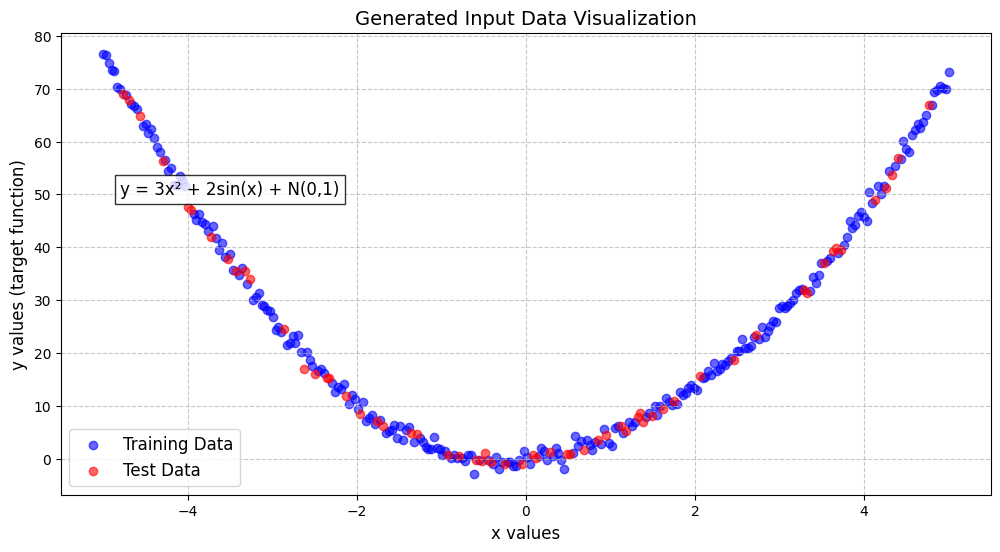

In [ ]:
import matplotlib.pyplot as plt

# Visualize the generated data
plt.figure(figsize=(12, 6))

# Plot training data (blue) and test data (red)
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.6)
plt.scatter(x_test, y_test, color='red', label='Test Data', alpha=0.6)

# Configure plot settings
plt.title('Generated Input Data Visualization', fontsize=14)
plt.xlabel('x values', fontsize=12)
plt.ylabel('y values (target function)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Display function equation on plot
plt.text(-4.8, 50, 'y = 3x² + 2sin(x) + N(0,1)',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [ ]:
#normalized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Problem2 _ Loss Function

In [ ]:
# create model with tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
import matplotlib.pyplot as plt

In [ ]:
def simple_model():
  model = Sequential([
      Dense(16, activation = 'relu', input_shape = (1,)),
      Dense(1)
  ])
  return model
model1 = simple_model()
model1.compile(optimizer = 'adam', loss = MeanSquaredError())
result_model1 = model1.fit(x_train, y_train, epochs=200, batch_size = 32 , validation_split = 0.2,verbose =0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 105.4292
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


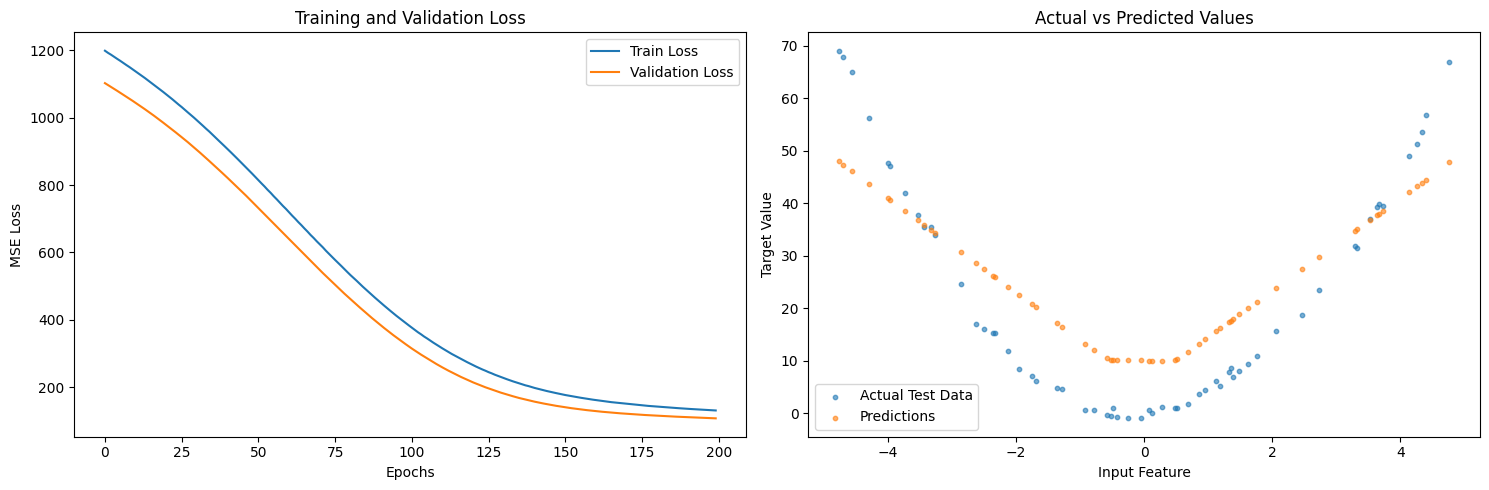

In [ ]:
test_loss = model1.evaluate(x_test, y_test)
y_pred = model1.predict(x_test).flatten()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(result_model1.history['loss'], label='Train Loss')
plt.plot(result_model1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, s=10, label='Actual Test Data', alpha=0.6)
plt.scatter(x_test, y_pred, s=10, label='Predictions', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def simple_model():
  model = Sequential([
      Dense(64, activation = 'relu', input_shape = (1,)),
      Dense(1)
  ])
  return model
model1 = simple_model()
model1.compile(optimizer = 'adam', loss = MeanSquaredError())
result_model1 = model1.fit(x_train, y_train, epochs=200, batch_size = 32 , validation_split = 0.2, verbose  = 0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 57.9436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


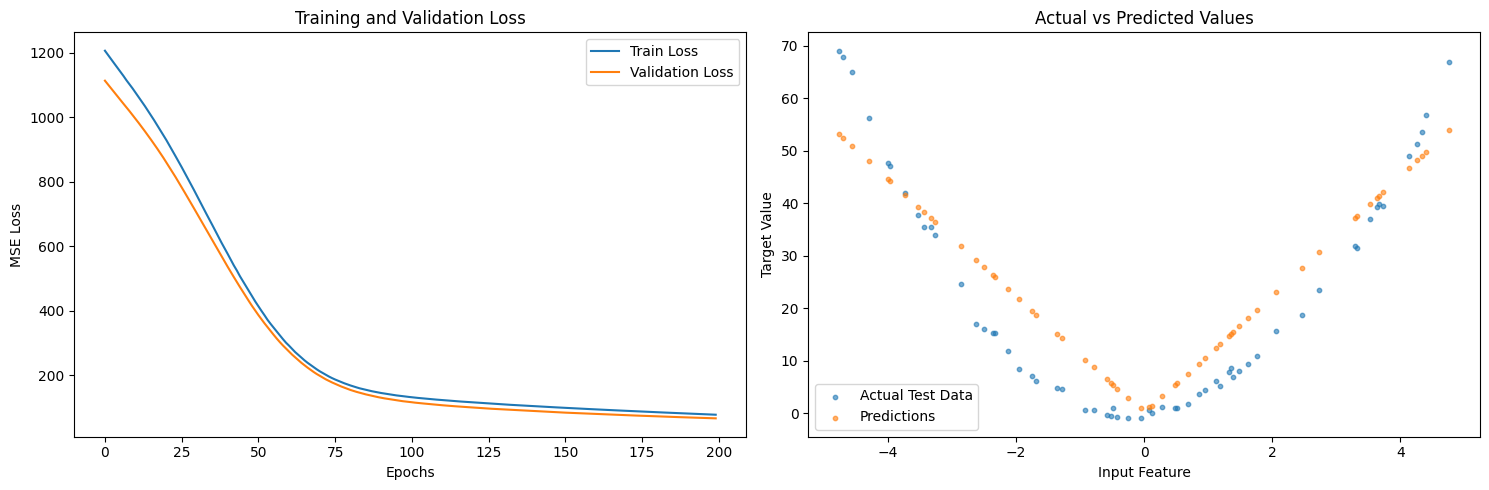

In [ ]:
test_loss = model1.evaluate(x_test, y_test)
y_pred = model1.predict(x_test).flatten()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(result_model1.history['loss'], label='Train Loss')
plt.plot(result_model1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, s=10, label='Actual Test Data', alpha=0.6)
plt.scatter(x_test, y_pred, s=10, label='Predictions', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def normal_model():
  model = Sequential([
      Dense(128, activation = 'relu', input_shape = (1,)),
      Dense(64, activation='relu'),
      Dense(1)
  ])
  return model
model2 = normal_model()
model2.compile(optimizer = 'adam', loss = MeanSquaredError())
result_model2 = model2.fit(x_train, y_train, epochs=200, batch_size = 32 , validation_split = 0.2,verbose =0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 1.6025
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


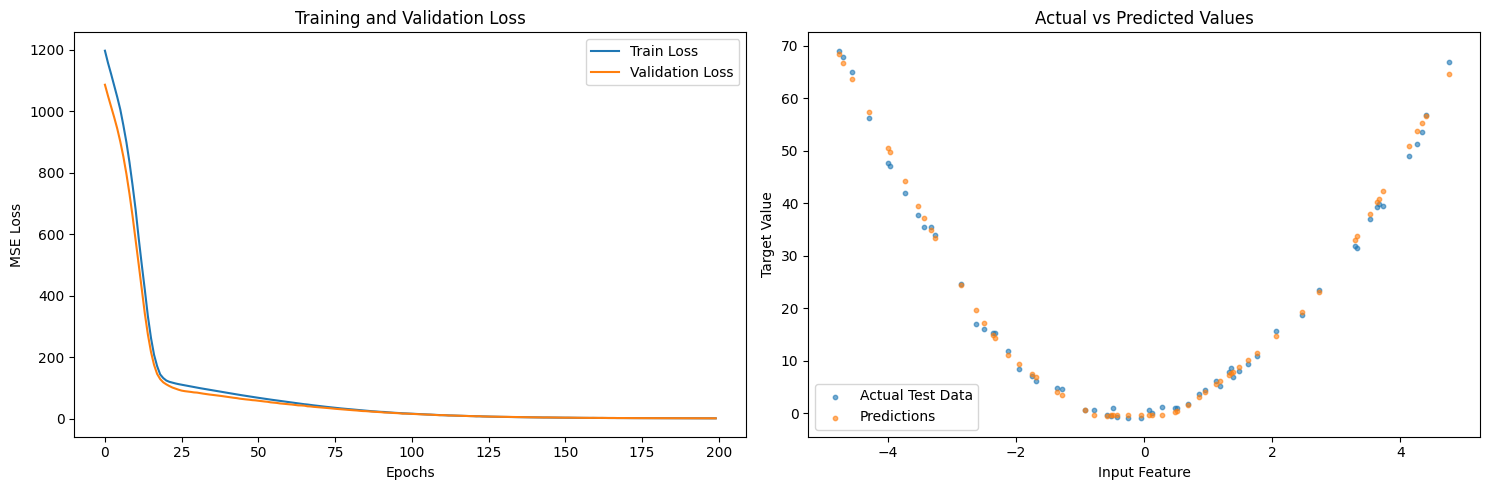

In [ ]:
test_loss = model2.evaluate(x_test, y_test)
y_pred = model2.predict(x_test).flatten()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(result_model2.history['loss'], label='Train Loss')
plt.plot(result_model2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, s=10, label='Actual Test Data', alpha=0.6)
plt.scatter(x_test, y_pred, s=10, label='Predictions', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def complex_model():
  model = Sequential([
      Dense(512, activation = 'relu', input_shape = (1,)),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
  ])
  return model
model3 = complex_model()
model3.compile(optimizer = 'adam', loss = MeanSquaredError())
result_model3 = model3.fit(x_train, y_train, epochs=200, batch_size = 32 , validation_split = 0.2, verbose = 0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1722
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


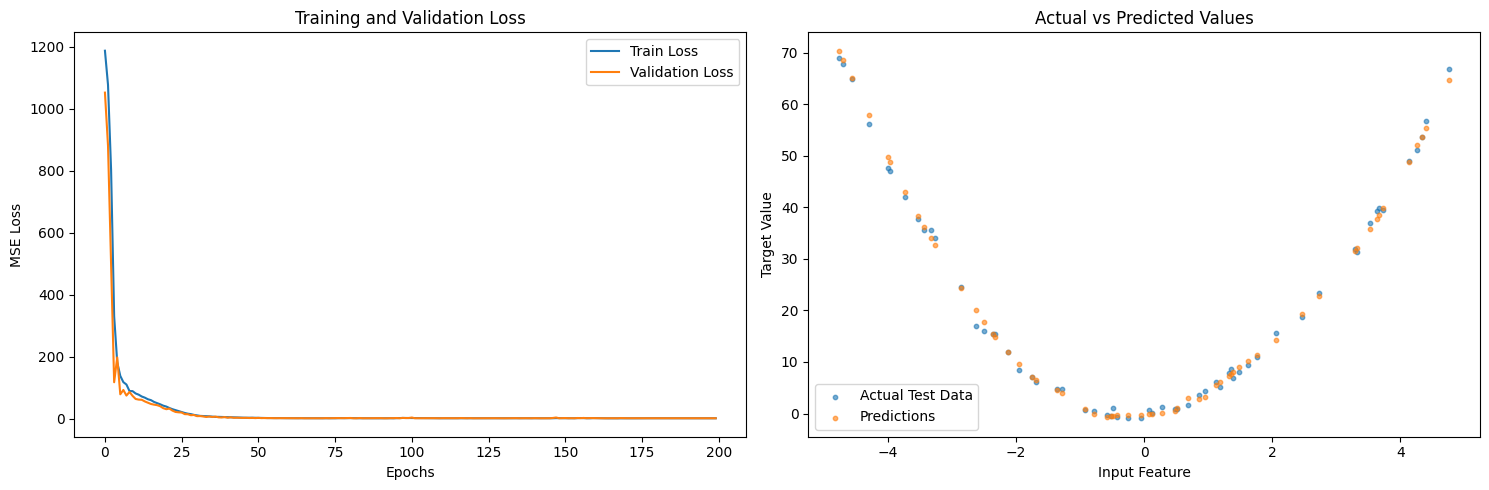

In [ ]:
test_loss = model3.evaluate(x_test, y_test)
y_pred = model3.predict(x_test).flatten()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(result_model3.history['loss'], label='Train Loss')
plt.plot(result_model3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, s=10, label='Actual Test Data', alpha=0.6)
plt.scatter(x_test, y_pred, s=10, label='Predictions', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def optimum_model():
  model = Sequential([
      Dense(256, activation = 'relu', input_shape = (1,)),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1)
  ])
  return model

In [ ]:
model_mse = optimum_model()
model_mse.compile(optimizer='adam', loss=MeanSquaredError())
history_mse = model_mse.fit(x_train, y_train,
                          epochs=100, batch_size=32,
                          validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_mae = optimum_model()
model_mae.compile(optimizer='adam', loss=MeanAbsoluteError())
history_mae = model_mae.fit(x_train, y_train,
                          epochs=200, batch_size=32,
                          validation_split=0.2,verbose=0)

In [ ]:
model_huber = optimum_model()
model_huber.compile(optimizer='adam', loss=Huber(delta=1.0))
history_huber = model_huber.fit(x_train, y_train,
                              epochs=100, batch_size=32,
                              validation_split=0.2,verbose=0)

In [ ]:
#evaluation models
results = {
    'MSE': model_mse.evaluate(x_test, y_test),
    'MAE': model_mae.evaluate(x_test, y_test),
    'Huber': model_huber.evaluate(x_test, y_test)
}
# print("evaluation models:")
# for name, metrics in results.items():
#     print(f"{name}: Loss = {metrics[0]:.4f}, MAE = {metrics[1]:.4f}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2782
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.7952
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4651


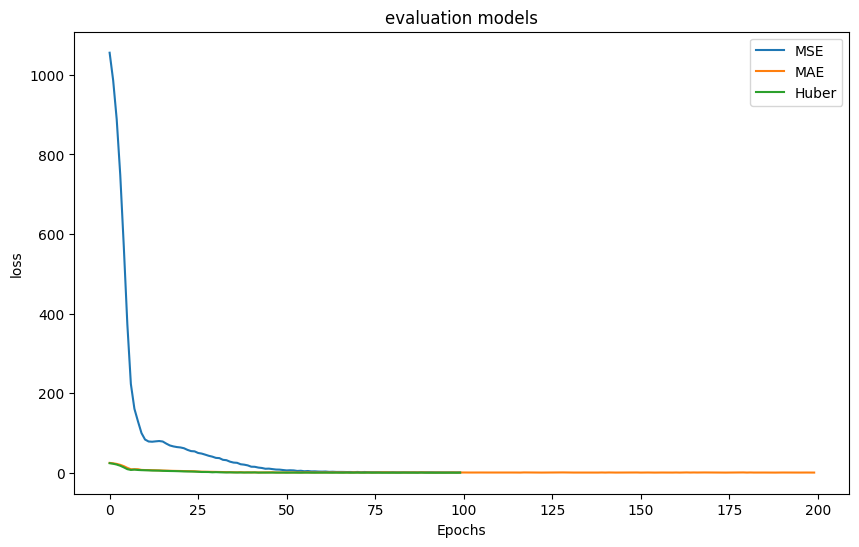

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_mse.history['val_loss'], label='MSE')
plt.plot(history_mae.history['val_loss'], label='MAE')
plt.plot(history_huber.history['val_loss'], label='Huber')
plt.title('evaluation models')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Problem3 _ LinearRegression

In [ ]:
#implemention base model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baseline Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
# Evaluate Linear Regression
y_pred_linear = linear_model.predict(x_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
# Evaluate MLP
mlp_mse = model_mse.evaluate(x_test, y_test, verbose=0)
# Performance Comparison
print("\nModel Performance Comparison:")
print(f"{'Metric':<15}{'LinearRegression':<20}{'MLP':<15}{'Improvement (%)':<15}")
print(f"{'MSE':<15}{linear_mse:<20.4f}{mlp_mse:<15.4f}{(linear_mse-mlp_mse)/linear_mse*100:.2f}")


Model Performance Comparison:
Metric         LinearRegression    MLP            Improvement (%)
MSE            474.0988            1.3551         99.71


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


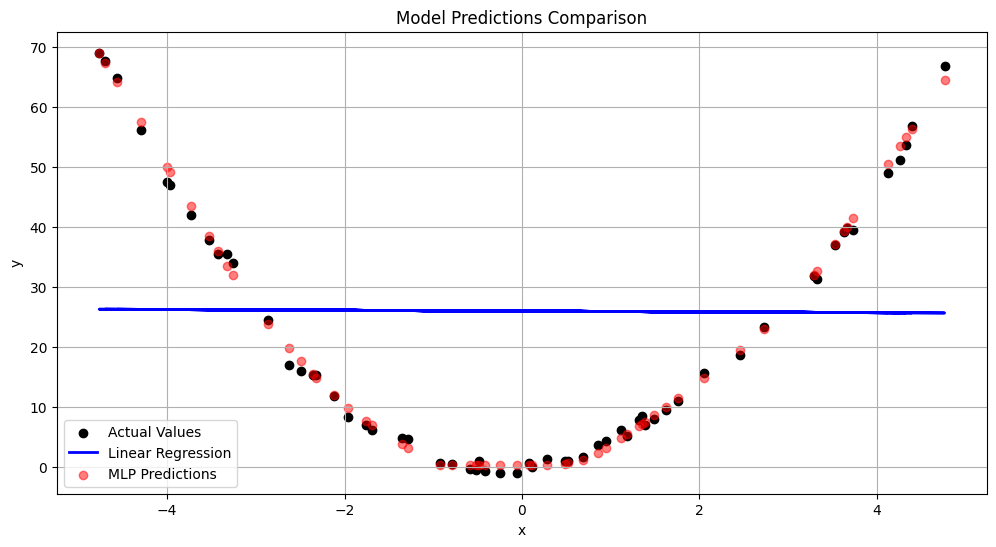

In [ ]:
# y_pred = model_mse.predict(x_test).flatten()
#  Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='black', label='Actual Values')
plt.plot(x_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')
plt.scatter(x_test, model_mse.predict(x_test), color='red', alpha=0.5, label='MLP Predictions')
plt.title('Model Predictions Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Problem4 _ PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Linear Model with Polynomial Features
# Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Train polynomial linear model
poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

# evaluation model
y_pred_poly = poly_model.predict(x_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# MLP model
y_pred_mlp = model_mse.predict(x_test)
mlp_mse = model_mse.evaluate(x_test, y_test, verbose=0)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
# Results Comparison
print("\nModel Comparison (MSE):")
print(f"{'Model':<25}{'MSE':<15}")
print(f"{'Simple Linear':<25}{linear_mse:<15.4f}")
print(f"{'Poly Features Linear':<25}{mse_poly:<15.4f}")
print(f"{'MLP':<25}{mlp_mse:<15.4f}")



Model Comparison (MSE):
Model                    MSE            
Simple Linear            474.0988       
Poly Features Linear     1.4225         
MLP                      1.3551         


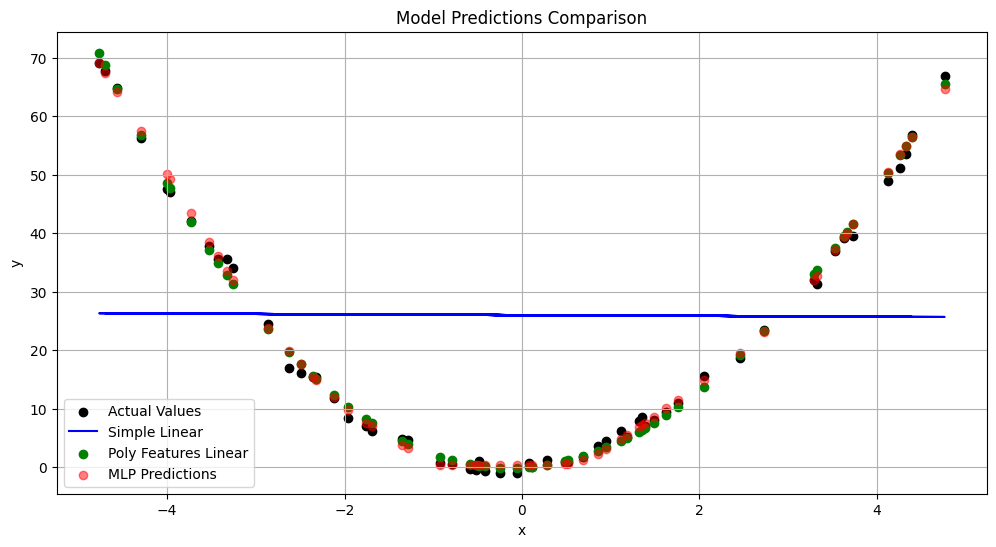

In [ ]:
#  Visualization
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='black', label='Actual Values')
plt.plot(x_test, y_pred_linear, color='blue', label='Simple Linear')
plt.scatter(x_test, y_pred_poly, color='green', label='Poly Features Linear')
plt.scatter(x_test, y_pred_mlp, color='red', alpha=0.5, label='MLP Predictions')
plt.title('Model Predictions Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Problem ـ Activation Function

In [ ]:
from tensorflow.keras.activations import relu, tanh, sigmoid

def optimum_model(activation_func):
  model = Sequential([
      Dense(256, activation = activation_func, input_shape = (1,)),
      Dense(128, activation=activation_func),
      Dense(64, activation=activation_func),
      Dense(1)
  ])
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model
# Train models with different activations

activations = {'ReLU': relu, 'Tanh': tanh, 'Sigmoid': sigmoid}
results = {}

for name, activation in activations.items():
    model = optimum_model(activation)
    history = model.fit(x_train, y_train,
                       epochs=200,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=0)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    results[name] = {
        'MSE': test_loss,
        'MAE': test_mae,
        'history': history
    }

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("\nActivation Function Comparison:")
print(f"{'Activation':<10}{'MSE':<15}{'MAE':<15}")
for name, res in results.items():
    print(f"{name:<10}{res['MSE']:<15.4f}{res['MAE']:<15.4f}")


Activation Function Comparison:
ActivationMSE            MAE            
ReLU      0.9482         0.7922         
Tanh      474.2704       19.7527        
Sigmoid   472.6049       19.7005        


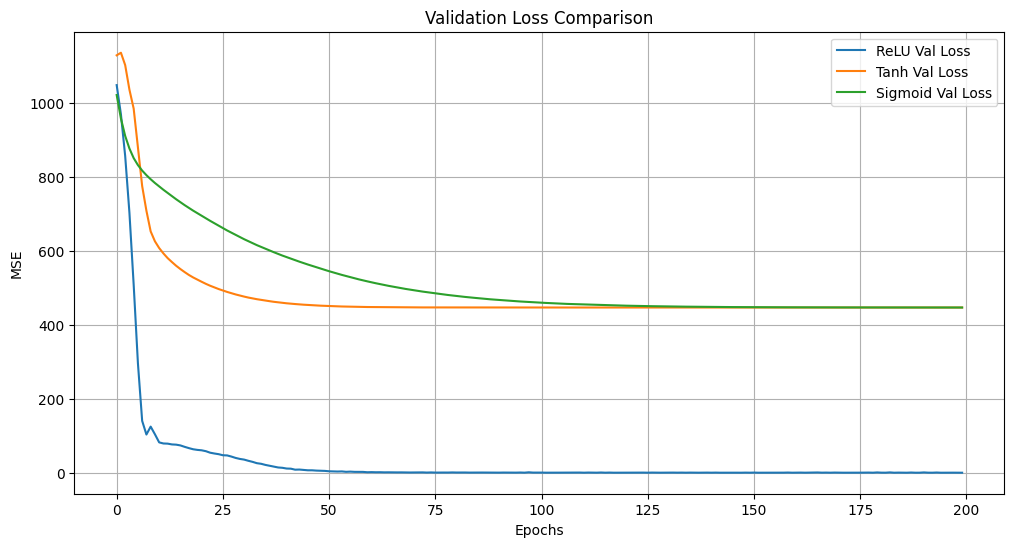

In [ ]:
plt.figure(figsize=(12, 6))
for name, res in results.items():
    plt.plot(res['history'].history['val_loss'], label=f'{name} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()